# Anlaysis of Jail Deaths in U.S.

https://www.reuters.com/investigates/special-report/usa-jails-graphic/

In [24]:
import numpy as np
import pandas as pd
import plotnine as p9
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import sqlalchemy as sqla
import plotly
import plotly.figure_factory as ff
import seaborn as sns
from plotnine import *
from sqlalchemy import create_engine
import plotly.graph_objects as go

In [3]:
# remove all warnings
import warnings
warnings.filterwarnings("ignore")

# option to show all columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None

### Importing Datasets

In [5]:
# create sql database
engine = sqla.create_engine('sqlite:///allstates.db')

with engine.begin() as connection:
    aj = pd.read_csv('data/all_jails.csv')
    ad = pd.read_csv('data/all_deaths.csv')
    aj.to_sql('jail', con=connection, if_exists='replace')
    ad.to_sql('deaths', con=connection, if_exists='replace')

We will start with the dataset  `all_jails.csv`.

In [ ]:
# ad = pd.read_csv('all_deaths.csv')
# aj = pd.read_csv('all_jails.csv')
aj.head()

### How are the jails distributed across US states?

In [ ]:
# Number of jails in each state
jails_state = aj.groupby('state')
jails_state.size()

##### Conclusion:
After reading the all_jails.cvs, we get the total number of jails in each state. We find California, Florida, and Texas have the most number of jails among all states, all of them are over 20. California is excessively higher than any other states which is 38. Moreover, except for Washington DC which is only 2, other states have the minimum number of jails, 10, which could be a national requirement. California, Florida, and Texas are the three populated states in the whole country so it is not surprisingly they get the highest number of jails. However, New York is also very populated but it only has 10 jails so I assume the scale of each jail is larger than usual. 

### What's the overall trend of jails with daily inmate population from 2008 to 2019?

In [ ]:
# Highest daily inmate population jails in 2008
aj.sort_values("adp2008",ascending=False)[['state','county','jail','adp2008']].head()

In 2008, the top 5 jails with the highest number of inmates were:
<br>1. Los Angeles County Sheriff's Department,all facilities from California, 
<br>2. Harris County Jails from Texas,
<br>3. Maricopa County Jail System from Arizona,
<br>4. Philadelphia Prison System Facilities from Pennsylvania,
<br>5. Miami-Dade Corrections Facilities from Florida

In [ ]:
# Highest daily inmate population jails in 2009
aj.sort_values("adp2009",ascending=False)[['state','county','jail','adp2009']].head()

In 2009, the top 5 jails with the highest number of inmates were:
<br>1. Los Angeles County Sheriff's Department,all facilities from California, 
<br>2. Harris County Jails from Texas,
<br>3. Philadelphia Prison System Facilities from Pennsylvania,
<br>4. Maricopa County Jail System from Arizona,
<br>5. Miami-Dade Corrections Facilities from Florida
<br>* One notable finding is that Philadelphia Prison System Facilities got higher inmates than Maricopa County Jail System in this year.

In [ ]:
# Highest daily inmate population jails in 2010
aj.sort_values("adp2010",ascending=False)[['state','county','jail','adp2010']].head()

In 2010, the top 5 jails with the highest number of inmates were:
<br>1. Los Angeles County Sheriff's Department,all facilities from California, 
<br>2. Harris County Jails from Texas,
<br>3. Cook County Jail from Illinois,
<br>4. Philadelphia Prison System Facilities from Pennsylvania,
<br>5. Maricopa County Jail System from Arizona
<br>* One notable finding is that the Cook County Jail from Illinois surpassed several jails from other states unexpectedly. The reason is that the inmate population data from 2008-2009 is missing.

In [ ]:
# Highest daily inmate population jails in 2011
aj.sort_values("adp2011",ascending=False)[['state','county','jail','adp2011']].head()

In 2011, the top 5 jails with the highest number of inmates were
<br>1. Los Angeles County Sheriff's Department,all facilities from California, 
<br>2. Harris County Jails from Texas,
<br>3. Cook County Jail from Illinois,
<br>4. Philadelphia Prison System Facilities from Pennsylvania,
<br>5. Maricopa County Jail System from Arizona
<br> * No notable change compared to last year.

In [ ]:
# Highest daily inmate population jails in 2012
aj.sort_values("adp2012",ascending=False)[['state','county','jail','adp2012']].head()

In 2012, the top 5 jails with the highest number of inmates were
<br>1. Los Angeles County Sheriff's Department,all facilities from California, 
<br>2. Cook County Jail from Illinois,
<br>3. Harris County Jails from Texas,
<br>4. Philadelphia Prison System Facilities from Pennsylvania,
<br>5. Maricopa County Jail System from Arizona
<br> *One notable finding is that although the jails in the list did not change, Cook County Jail surpassed Harris County Jail this year.

In [ ]:
# Highest daily inmate population jails in 2013
aj.sort_values("adp2013",ascending=False)[['state','county','jail','adp2013']].head()

In 2013, the top 5 jails with the highest number of inmates were
<br>1. Los Angeles County Sheriff's Department,all facilities from California, 
<br>2. Cook County Jail from Illinois,
<br>3. Harris County Jails from Texas,
<br>4. Philadelphia Prison System Facilities from Pennsylvania,
<br>5. Maricopa County Jail System from Arizona
<br> *No notable change compared to last year.

In [ ]:
# Highest daily inmate population jails in 2014
aj.sort_values("adp2014",ascending=False)[['state','county','jail','adp2014']].head()

In 2014, the top 5 jails with the highest number of inmates were
<br>1. Los Angeles County Sheriff's Department,all facilities from California, 
<br>2. Cook County Jail from Illinois,
<br>3. Harris County Jails from Texas,
<br>4. Philadelphia Prison System Facilities from Pennsylvania,
<br>5. Maricopa County Jail System from Arizona.
<br>*No notable change compared to last two years.

In [ ]:
# Highest daily inmate population jails in 2015
aj.sort_values("adp2015",ascending=False)[['state','county','jail','adp2015']].head()

In 2015, the top 5 jails with the highest number of inmates were
<br>1. Los Angeles County Sheriff's Department,all facilities from California, 
<br>2. Harris County Jails from Texas,
<br>3. Cook County Jail from Illinois,
<br>4. Philadelphia Prison System Facilities from Pennsylvania,
<br>5. Maricopa County Jail System from Arizona.
<br>*One notable finding is that the population in Harris County Jails surpassed that of Cook County Jail again and the number of inmates were very closed. 

In [ ]:
# Highest daily inmate population jails in 2016
aj.sort_values("adp2016",ascending=False)[['state','county','jail','adp2016']].head()

In 2016, the top 5 jails with the highest number of inmates were
<br>1. Los Angeles County Sheriff's Department,all facilities from California, 
<br>2. Harris County Jails from Texas,
<br>3. Cook County Jail from Illinois,
<br>4. Philadelphia Prison System Facilities from Pennsylvania,
<br>5. Maricopa County Jail System from Arizona.
<br>*No notable change compared to last year.

In [ ]:
# Highest daily inmate population jails in 2017
aj.sort_values("adp2017",ascending=False)[['state','county','jail','adp2017']].head()

In 2017, the top 5 jails with the highest number of inmates were
<br>1. Los Angeles County Sheriff's Department,all facilities from California, 
<br>2. Harris County Jails from Texas,
<br>3. Maricopa County Jail System from Arizona,
<br>4. Cook County Jail from Illinois,
<br>5. Philadelphia Prison System Facilities from Pennsylvania.
<br> *One notable finding is that the Maricopa County Jail System became the third highest number of inmates in the whole country.

In [ ]:
# Highest daily inmate population jails in 2018
aj.sort_values("adp2018",ascending=False)[['state','county','jail','adp2018']].head()

In 2018, the top 5 jails with the highest number of inmates were
<br>1. Los Angeles County Sheriff's Department,all facilities from California, 
<br>2. Harris County Jails from Texas,
<br>3. Maricopa County Jail System from Arizona,
<br>4. Cook County Jail from Illinois,
<br>5. Philadelphia Prison System Facilities from Pennsylvania.
<br>*No notable change compared to last year.

In [ ]:
# Highest daily inmate population jails in 2019
aj.sort_values("adp2019",ascending=False)[['state','county','jail','adp2019']].head()

In 2019, the top 5 jails with the highest number of inmates were
<br>1. Los Angeles County Sheriff's Department,all facilities from California, 
<br>2. Harris County Jails from Texas,
<br>3. New York City Anna M. Kross Center from New York
<br>4. Cook County Jail from Illinois,
<br>5. Philadelphia Prison System Facilities from Pennsylvania.
<br> *One notable finding is that New York replaces Arizona which data is missing in 2019.

##### Conclusion:
According to the results, the highest inmate population rankings were relatively stable from 2008-2019 especially in some consecutive years. Jails from California, Texas, Pennsylvania, Illinois, and Arizona are always in the top 5 if the data is not missing. Florida has a high number of jails but it is not on the list, so we assume prisoners in Florida spread widely across the state instead of being concentrated in one jail.

### How does inmate population in each state change by year?
<br>We will first construct a dataframe inmate_state_mean that calculats average inmate population in each jail of the state, and it includes columns from year 2008 to 2019 and the average mean in 12 years.

In [ ]:
# Mean inmate population in each state by year
inmate_state_mean = pd.DataFrame()
inmate_state_mean['2008'] = aj.groupby('state')['adp2008'].mean()
inmate_state_mean['2009'] = aj.groupby('state')['adp2009'].mean()
inmate_state_mean['2010'] = aj.groupby('state')['adp2010'].mean()
inmate_state_mean['2011'] = aj.groupby('state')['adp2011'].mean()
inmate_state_mean['2012'] = aj.groupby('state')['adp2012'].mean()
inmate_state_mean['2013'] = aj.groupby('state')['adp2013'].mean()
inmate_state_mean['2014'] = aj.groupby('state')['adp2014'].mean()
inmate_state_mean['2015'] = aj.groupby('state')['adp2015'].mean()
inmate_state_mean['2016'] = aj.groupby('state')['adp2016'].mean()
inmate_state_mean['2017'] = aj.groupby('state')['adp2017'].mean()
inmate_state_mean['2018'] = aj.groupby('state')['adp2018'].mean()
inmate_state_mean['2019'] = aj.groupby('state')['adp2019'].mean()
inmate_state_mean['all mean'] = inmate_state_mean.mean(axis = 1)
inmate_state_mean.head()

In [ ]:
inmate_state_mean['all mean'].sort_values(ascending = False)

##### Conclusion:
From the table, we verify our assumption that Florida inmates spread widely across the state in different jails as its mean value. However, there is a great population in New York which only has 10 jails, the average population is still not as high as that of Florida, Texas, and California, which is a surprising finding. New York average inmate population is lower than our expected.

Then, We look at the total inmate population in each state by year.

In [ ]:
# Total inmate population in each state by year
inmate_state_year = pd.DataFrame()
inmate_state_year['2008'] = aj.groupby('state')['adp2008'].mean()
inmate_state_year['2009'] = aj.groupby('state')['adp2009'].mean()
inmate_state_year['2010'] = aj.groupby('state')['adp2010'].mean()
inmate_state_year['2011'] = aj.groupby('state')['adp2011'].mean()
inmate_state_year['2012'] = aj.groupby('state')['adp2012'].mean()
inmate_state_year['2013'] = aj.groupby('state')['adp2013'].mean()
inmate_state_year['2014'] = aj.groupby('state')['adp2014'].mean()
inmate_state_year['2015'] = aj.groupby('state')['adp2015'].mean()
inmate_state_year['2016'] = aj.groupby('state')['adp2016'].mean()
inmate_state_year['2017'] = aj.groupby('state')['adp2017'].mean()
inmate_state_year['2018'] = aj.groupby('state')['adp2018'].mean()
inmate_state_year['2019'] = aj.groupby('state')['adp2019'].mean()
inmate_state_year['all mean'] = inmate_state_year.mean(axis = 1)
inmate_state_year.head()

### What's the overall trend of inmate population?
<br> We construct a table 'inmate_diff' that calculates the differences of inmate population of each jail in each two years. 

In [ ]:
inmate_diff = pd.DataFrame()
inmate_diff['state'] = aj['state']
inmate_diff['county'] = aj['county']
inmate_diff['jail'] = aj['jail']
inmate_diff['08-09'] = aj['adp2009']-aj['adp2008']
inmate_diff['09-10'] = aj['adp2010']-aj['adp2009']
inmate_diff['10-11'] = aj['adp2011']-aj['adp2010']
inmate_diff['11-12'] = aj['adp2012']-aj['adp2011']
inmate_diff['12-13'] = aj['adp2013']-aj['adp2012']
inmate_diff['13-14'] = aj['adp2014']-aj['adp2013']
inmate_diff['14-15'] = aj['adp2015']-aj['adp2014']
inmate_diff['15-16'] = aj['adp2016']-aj['adp2015']
inmate_diff['16-17'] = aj['adp2017']-aj['adp2016']
inmate_diff['17-18'] = aj['adp2018']-aj['adp2017']
inmate_diff['18-19'] = aj['adp2019']-aj['adp2018']
inmate_diff.head()

In [ ]:
inmate_diff.sum(axis=0)[3:]

In [ ]:
plt.plot(inmate_diff.sum(axis=0)[3:])

##### Conclusion:
According to the column sum results, we can conclude that total population decreased from 2008-2019.

In [ ]:
inmate_diff['total'] = inmate_diff.sum(axis=1)

In [ ]:
# The total number of change from 2008 to 2019 in each jail.
diff_years = inmate_diff.groupby('state').sum()
diff_years.sum(axis=1).sort_values(ascending=True)

##### Conclusion:
Among all states, Florida has the largest amount of decreasing in inmate population, while Kentucky has the largest amount of increaseing in inmate population. 

### What's the distribution of each cause of jail death?

To give a sense of the overall distribution of different causes, heatmaps with clustering dendrogram are shown below:

In [ ]:
names = aj.columns
# death ratio
death_col = names[[x.startswith('d2') for x in names]].to_list()
adp_col = names[[x.startswith('adp') for x in names]].to_list()

# cause of death
da_col = names[[x.startswith('da') for x in names]].to_list()
su_col = names[[x.startswith('su') for x in names]].to_list()
ac_col = names[[x.startswith('ac') for x in names]].to_list()
ho_col = names[[x.startswith('ho') for x in names]].to_list()
o_col = names[[x.startswith('o') for x in names]].to_list()
il_col = names[[x.startswith('il') for x in names]].to_list()



# Heatmap: Cause of Death
avg_inmate_pop = aj[adp_col+['state']].groupby(['state']).mean().mean(axis=1)
base = avg_inmate_pop.copy()

cause_df = pd.DataFrame({
    'state':aj.state,
    'county':aj.county,
    'drug/alcohol':aj[da_col].sum(axis=1),
    'suicide':aj[su_col].sum(axis=1),
    'accident':aj[ac_col].sum(axis=1),
    'homicide':aj[ho_col].sum(axis=1),
    'illness':aj[il_col].sum(axis=1),
    'others':aj[da_col].sum(axis=1)
})


state_cause_df = cause_df.drop(columns=['county']).groupby(['state']).mean()
state_cause_df = state_cause_df.apply(lambda x: x/base, axis=0)
sns.clustermap(state_cause_df, cmap='flare', yticklabels=True)

##### Conclusion:
It follows from our previous conclusion that natural death/illness consists of most of jail deaths over all, except for states of Montana, Wyoming, Idaho and Maine, whose suicide percentage clearly exceeds that of natural death/illness. State of New Hampshire, Montana, Maine and West Virginia have comparably higher rate of suicide. State of New Hampshire, Maine, and West Virginia have comparably higher rate of drug/alcohol related death. Interestingly, the number from the "Others" category seem to coincide with "drug/alcohol". At the end, no state have particularly higher rate of death related to accident and homicide.

In [ ]:
avg_inmate_pop_ca = aj[aj.state=='California'][adp_col+['county']].groupby(['county']).mean().mean(axis=1)
ca_cause_df = cause_df[cause_df.state=='California'].groupby(['county']).mean()
ca_cause_df = ca_cause_df.apply(lambda x: x/avg_inmate_pop_ca, axis=0)
sns.clustermap(ca_cause_df, cmap='flare', yticklabels=True)

##### Conclusion:
We also look at California counties using the same procedure. In particular, county of San Luis Obispo and San Diego have noticably higher natural death/illness percentage comparing to the rest. All counties have similar suicide rate, except for the county of Orange, whose suicide rate is 0, cumulative from 2009 to 2019. County of San Diego, San Luis Obispo and Kern have comparatively higher death rate related to Drug and Alcohol use. County of Santa Barbara has comparatively higher death rate related to accident.

### Top ranked US States with highest overall proportion of different causes of jail deaths
Now we will construct tables of top ranked US States with highest overall proportion of different causes of jail deaths using sql query.

In [ ]:
query1 = """SELECT state, sum(su2008)/sum(d2008) as suicide_rate,
            sum(il2008)/sum(d2008) as IN_death_rate,
            sum(da2008)/sum(d2008) as DA_death_rate,
            sum(o2008)/sum(d2008) as other_death_rate,
            sum(ho2008)/sum(d2008) as homicide_death_rate,
            sum(ac2008)/sum(d2008) as accident_death_rate,
            (sum(d2008)-sum(su2008)-sum(il2008)-sum(da2008)-sum(o2008)-sum(ho2008)-sum(ac2008))/sum(d2008) as undocumented_death_rate
            FROM jail GROUP BY state""" #distribution of jail deaths across states

In [ ]:
# Rank states by overall proprotion of suicides in jail
with engine.begin() as conn:
    ds1 = pd.read_sql_query(query1, conn).sort_values(by=['suicide_rate'], ascending=False)[['state','suicide_rate']].head()
ds1

In [ ]:
# Rank states by overall proportion of illness/natural deaths in jail
with engine.begin() as conn:
    ds2= pd.read_sql_query(query1, conn).sort_values(by=['IN_death_rate'], ascending=False)[['state','IN_death_rate']].head()
ds2

In [ ]:
# Rank states by overall proportion of acute drug/alcohol-related deaths in jail
with engine.begin() as conn:
    ds2= pd.read_sql_query(query1, conn).sort_values(by=['DA_death_rate'], ascending=False)[['state','DA_death_rate']].head()
ds2

In [ ]:
# Rank states by overall proportion of other deaths in jail
with engine.begin() as conn:
    ds3= pd.read_sql_query(query1, conn).sort_values(by=['other_death_rate'], ascending=False)[['state','other_death_rate']].head()
ds3

In [ ]:
# Rank states by overall proportion of homicides in jail
with engine.begin() as conn:
    ds4= pd.read_sql_query(query1, conn).sort_values(by=['homicide_death_rate'], ascending=False)[['state','homicide_death_rate']].head()
ds4

In [ ]:
# Rank states by overall proportion of accident deaths in jail
with engine.begin() as conn:
    ds5= pd.read_sql_query(query1, conn).sort_values(by=['accident_death_rate'], ascending=False)[['state','accident_death_rate']].head()
ds5

In [ ]:
# Rank states by overall proportion of undocumented deaths in jail
with engine.begin() as conn:
    ds6= pd.read_sql_query(query1, conn).sort_values(by=['undocumented_death_rate'], ascending=False)[['state','undocumented_death_rate']].head()
ds6

Now, we will start to look at the dataset `all_death.csv`.

In [ ]:
ad.head()

### Number of deaths in jail from 2008-2019

In [ ]:
deaths_year = ad.groupby('year')
deaths_year.size()

##### Conclusion:
We see an ascending trend of the number of deaths in jain from 2008-2015.

### What's the distribution of the number of deaths in jails?

In [8]:
# Number of deaths in jails in 50 states
death_year_jail = ad.groupby(['year','jail'])

In [9]:
year = [a_tuple[0] for a_tuple in list(death_year_jail.groups)]
jail = [a_tuple[1] for a_tuple in list(death_year_jail.groups)]
counts = list()
temp = death_year_jail.size()
for i in temp:
    counts.append(i)
death_year_jail = pd.DataFrame()
death_year_jail['year'] = year
death_year_jail['jail'] = jail
death_year_jail['counts'] = counts
death_year_jail.head()

,year,jail,counts
0,2008,Ada County Jail,2
1,2008,Adams County Detention Facility,3
2,2008,Aiken County Detention Center,1
3,2008,Alachua County Jail,1
4,2008,Alameda County Santa Rita Jail,13


In [10]:
death_year_jail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3076 entries, 0 to 3075
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    3076 non-null   int64 
 1   jail    3076 non-null   object
 2   counts  3076 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 72.2+ KB


##### Conclusion:
This dataframe is about the number of deaths in each jail in each year, but the data is large which is hard to get a clear conclusion, so we will focus on the status in California.

Then, we construct the dataframe'death_year_state' which is related to the toatl deaths in jails in the whole state.

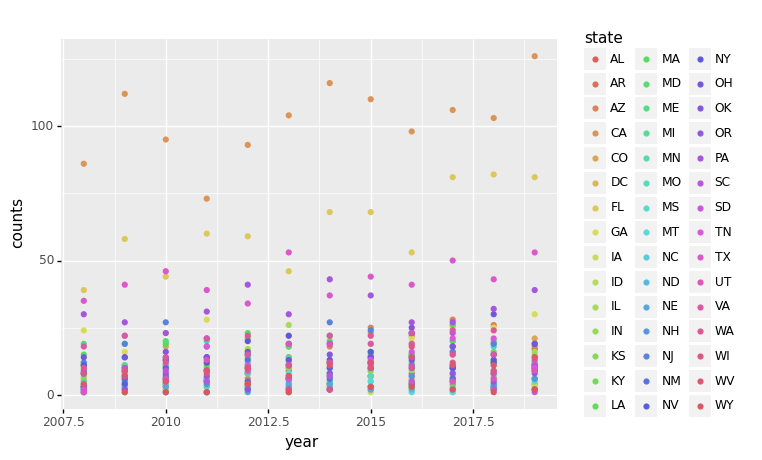

<ggplot: (8788382395892)>

In [11]:
# Plot for number of jail deaths by states
death_year_state = ad.groupby(['year','state'])
year = [a_tuple[0] for a_tuple in list(death_year_state.groups)]
state = [a_tuple[1] for a_tuple in list(death_year_state.groups)]
counts = list()
temp = death_year_state.size()
for i in temp:
    counts.append(i)
death_year_state = pd.DataFrame()
death_year_state['year'] = year
death_year_state['state'] = state
death_year_state['counts'] = counts
gg = p9.ggplot(death_year_state)
gg += p9.aes(x='year',y='counts',color='state') # add color mapping
gg += p9.geom_point()
gg

##### Conclusion:
We plot the dataframe, and we find out california alaways has the highest number of deaths and Florida has the second highest deaths in most of the years. All in all, California, Florida, Texas, Pennsylvania have the top rankings of deaths which correspond to the inmate population. 

In [12]:
# Join inmate by state and get correlationin in each year
inmate_state_year = pd.DataFrame()
inmate_state_year['2008'] = aj.groupby('statecode')['adp2008'].sum()
inmate_state_year['2009'] = aj.groupby('statecode')['adp2009'].sum()
inmate_state_year['2010'] = aj.groupby('statecode')['adp2010'].sum()
inmate_state_year['2011'] = aj.groupby('statecode')['adp2011'].sum()
inmate_state_year['2012'] = aj.groupby('statecode')['adp2012'].sum()
inmate_state_year['2013'] = aj.groupby('statecode')['adp2013'].sum()
inmate_state_year['2014'] = aj.groupby('statecode')['adp2014'].sum()
inmate_state_year['2015'] = aj.groupby('statecode')['adp2015'].sum()
inmate_state_year['2016'] = aj.groupby('statecode')['adp2016'].sum()
inmate_state_year['2017'] = aj.groupby('statecode')['adp2017'].sum()
inmate_state_year['2018'] = aj.groupby('statecode')['adp2018'].sum()
inmate_state_year['2019'] = aj.groupby('statecode')['adp2019'].sum()
inmate_state_year.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
statecode,,,,,,,,,,,,
AL,8856.81,8770.56,8740.67,8485.79,9058.46,9069.93,8318.17,7661.36,7343.64,7750.81,8781.35,7608.00
AR,4077.11,4077.98,4338.58,3817.71,3946.14,4355.48,4701.09,4592.32,4465.69,4593.46,4575.47,4719.42
AZ,15390.98,14627.30,13098.58,13113.53,13783.97,14183.01,13671.93,13440.18,12985.08,12934.45,12546.75,5068.38
CA,66138.00,64732.00,58814.00,56685.00,62472.00,66334.00,65165.00,59248.00,59412.00,59842.00,59447.00,58793.51
CO,9845.25,9787.77,9503.50,9247.94,9391.11,9636.71,9208.14,9322.79,9361.88,10154.60,10247.00,9681.80


In [ ]:
inmate_state_year.info()

In [14]:
for i in range(2008,2020):
    temp = death_year_state.loc[death_year_state['year']==i].copy()
    temp.rename(columns={'state':'statecode'}, inplace=True)
    temp.rename(columns={'counts':'{} deaths'.format(i)}, inplace=True)
    temp = temp.set_index('statecode').iloc[:,1]
    inmate_state_year = inmate_state_year.join(temp)
inmate_state_year.corr(method='pearson').iloc[0:12,12:24]

,2008 deaths,2009 deaths,2010 deaths,2011 deaths,2012 deaths,2013 deaths,2014 deaths,2015 deaths,2016 deaths,2017 deaths,2018 deaths,2019 deaths
2008,0.949472,0.955567,0.943960,0.943552,0.942260,0.935192,0.942553,0.960899,0.941263,0.953827,0.957076,0.957196
2009,0.953560,0.955702,0.948130,0.946035,0.944194,0.939600,0.942920,0.963338,0.944618,0.952751,0.955280,0.960587
2010,0.946675,0.935963,0.941131,0.946052,0.946935,0.948278,0.942500,0.957079,0.938023,0.950893,0.946292,0.954211
2011,0.942795,0.931088,0.939292,0.946934,0.942046,0.946601,0.938704,0.953513,0.936321,0.949569,0.942972,0.951348
2012,0.953626,0.942540,0.951488,0.945696,0.946864,0.958363,0.949920,0.963282,0.946661,0.952104,0.945082,0.960133
2013,0.960925,0.951475,0.956388,0.945615,0.953593,0.963412,0.961840,0.972748,0.954921,0.955490,0.951409,0.968484
2014,0.958273,0.949450,0.957667,0.942691,0.946836,0.962678,0.952860,0.967949,0.949961,0.950751,0.946347,0.964191
2015,0.947186,0.940590,0.949326,0.944469,0.940284,0.952652,0.945882,0.963859,0.943120,0.951545,0.948201,0.960926
2016,0.946662,0.941654,0.949727,0.938788,0.938865,0.953599,0.944797,0.963451,0.944220,0.949467,0.945620,0.961318
2017,0.945041,0.939577,0.944944,0.935982,0.934575,0.950528,0.939140,0.960742,0.941131,0.950259,0.946024,0.964309


##### Conclusion:
On the left side, inmate_state_year contains inmate population of each state in each year and on the right side, deaths of each state in each year. Also the correlation table diagonol shows that deaths is closely related to the inmate population.

Now, we are going to look at the geographic distribution of Jail Death.

In [29]:
## Geographic Distribution of Jail Death
death_col_name = aj.columns[8:20].to_list()

df = aj.dropna(subset=death_col_name) # drop NA: yearly death counts
df = df.dropna(subset=['fips']) # drop NA: fips

# plot geographic distribution
fips = df.fips.to_list()
values = list(np.log(df.iloc[:, 8:20].sum(axis=1)))
endpts = list(np.mgrid[0:max(values)])
colorscale=[
    'rgb(70, 193, 193)',
    'rgb(239,239,239)',
    'rgb(195, 196, 222)',
    'rgb(144,148,194)',
    'rgb(101,104,168)',
    'rgb(65, 53, 132)',
    'rgb(65, 53, 50)']

#fig = ff.create_choropleth(fips=fips, values=values, binning_endpoints=endpts, colorscale=colorscale,
#                           county_outline={'color': 'rgb(255,255,255)', 'width': 0.8},
#                           legend_title='Log of Total Deaths', title='Geographic Distribution of Death Count')

#fig.layout.template = None
#fig.show()

##### Conclusion:
The map gives us a geographic distribution of all jails. The color scale reflects the number of deaths in each county. A log-transformation is applied since the number of deaths can vary from very large values in some counties to as small as 0. Counties are colored black if the log of total deaths exceeds 5; counties are colored green if there is no death, cumulatively from 2009 to 2019. Interestingly, blocks that are black are mostly located on the mid-west side of the US.

Now, we will explore the number of jain death from 2008-2019 by months.

In [ ]:
month = [a_tuple.split('/')[0] for a_tuple in ad['date_of_death'].dropna()]

In [ ]:
month = pd.DataFrame(month)
month.columns=['month']

In [ ]:
temp = month.groupby('month')

In [ ]:
month = pd.DataFrame()
month['month'] = temp.groups.keys()
month['counts'] = temp.size().values

In [ ]:
month = month.replace(559,560)

In [ ]:
month.drop(month.index[month['counts']==1],inplace=True)

In [ ]:
month = month.astype(float)

In [ ]:
month = month.sort_values(by="month")
month.reset_index(drop=True)

Then we will visualize the data using ggplot.

In [ ]:
# Plot for the number of jail death by month
gg = p9.ggplot(month)
gg += p9.aes(x='month',y='counts') # add color mapping
gg += p9.geom_point()
gg

##### Conclusion:
We also want to get the relationship between month and number of death to see if it influences.  We can see that colder months such as November, December, January, and Feburary are lower in the number of deaths. Therefore, colder weather or possible restrictions in these months might be reasons. In additiom, from April to August, it is steadily growing. However, there is an exception in March, which is also higher than most of the months.

Now we are interested in the jail death distribution in California spesifically.

In [ ]:
# Jail Death in California
with engine.begin() as conn:
    ca_df = pd.read_sql_query("SELECT * FROM jail WHERE statecode == \'CA\'", conn)
    
dendro_df = ca_df.dropna(subset=death_col_name)
dendro_df = dendro_df.dropna(subset=['county'])

# all counties in CA
sum_death = dendro_df[death_col_name].sum(axis=1)
ca_dendro1 = dendro_df[death_col_name].set_index(dendro_df.county)

sns.clustermap(ca_dendro1, cmap='coolwarm')

We noticed that the Los Angeles county stands out among the rest, which is reflected in the first layer of hierachical clustering dendrogram. The column clustering based on year gives us a general idea of the overall pattern of death counts in different years. Overall, we do not observe any time series pattern. The row clustering based on counties should give us some idea of which counties have particularly high death counts in California. In order to produce a better comparison, we will remove Los Angeles and look at the rest.

In [ ]:
# all counties in CA, excluding Los Angeles
dendro_df2 = dendro_df[dendro_df.county != 'Los Angeles']
ca_dendro2 = dendro_df2[death_col_name].set_index(dendro_df2.county)

sns.clustermap(ca_dendro2, col_cluster=False, cmap='coolwarm')

##### Conclusion:
Here we removed the county of Los Angeles. We also removed the column clustering because year seems to be an unrelated factor for death counts. Roughly, the average death count is between 2.5 to 5 per year. The deathcount in jails from counties including San Diego, Fresno, San Bernardino, Alameda and Orange have higher death counts overall. The highest death count is observed in Alameda county in year of 2008. 

Now we are going to explore the average percentage of in-jail death in California.

In [ ]:
# Jail Death Rate
# Data Munging


names = aj.columns
# death ratio
death_col = names[[x.startswith('d2') for x in names]].to_list()
adp_col = names[[x.startswith('adp') for x in names]].to_list()

# cause of death
da_col = names[[x.startswith('da') for x in names]].to_list()
su_col = names[[x.startswith('su') for x in names]].to_list()
ac_col = names[[x.startswith('ac') for x in names]].to_list()
ho_col = names[[x.startswith('ho') for x in names]].to_list()
o_col = names[[x.startswith('o') for x in names]].to_list()
il_col = names[[x.startswith('il') for x in names]].to_list()

avg_d = aj[death_col].mean(axis=1)
avg_adp = aj[adp_col].mean(axis=1)
avg_dr = 100*avg_d/avg_adp

dr_ = pd.DataFrame({
    'county': aj.county,
    'state':aj.state,
    'avg_dr': avg_dr,
    'avg_pop': avg_adp
})

# All states
dr_by_state = dr_.groupby(['state']).mean()
dr_by_state['state'] = dr_by_state.index
dr_by_state.sort_values('avg_dr', ascending=False, inplace=True)
dr_by_state.avg_dr = dr_by_state.avg_dr.apply(lambda x: round(x,3))
# California
dr_in_ca = dr_[dr_['state']=='California'].groupby(['county']).mean()
dr_in_ca['county'] = dr_in_ca.index
dr_in_ca.sort_values('avg_dr', ascending=False, inplace=True)
dr_in_ca.avg_dr = dr_in_ca.avg_dr.apply(lambda x: round(x,3))



# Plot


(
    ggplot(dr_in_ca, aes(x='county', y='avg_dr', fill='avg_dr'))
    + geom_bar(stat='identity')
    + geom_text(aes(x='county',y='avg_dr', label='avg_dr'), nudge_y = 0.01)
    + coord_flip()
    + xlim(dr_in_ca['county'][::-1])
    + theme(figure_size = (10, 10))
    + labs(title='Average Percentage of In-Jail Death, California',
          y='Death Percentage in %')
)

##### Conclusion:
The percentage of death is calculated by summing the total death counts in each county and then divided by the total incarcenated population in each county. Among all counties in California, San Diego and Kern county has the highest death rate in jail. Surprisingly, the Los Angeles county does not stand out as it was in previous heatmap. Overall, San Bernardino has the lowest death rate at only 0.075%.

Then, we'll look at average percentage of in-jail death across all states.

In [ ]:
(
    ggplot(dr_by_state, aes(x='state', y='avg_dr', fill='avg_dr'))
    + geom_bar(stat='identity')
    + geom_text(aes(x='state',y='avg_dr', label='avg_dr'), nudge_y = 0.007)
    + coord_flip()
    + xlim(dr_by_state['state'][::-1])
    + theme(figure_size = (10, 10))
    + labs(title='Average Percentage of In-Jail Death, All States',
          y='Death Percentage in %')
)

##### Conclusion:
By looking at the average death rate across all states, we see that Washington DC has unusually high death rate at nearly 0.25%, followed by West Virginia and Maryland. Interestly, the three states are located quite close to each other. The state of California is ranked fourth, whose average death rate is around 0.2%. The state of Iowa, Wyoming and Alabama have the lowest death rate at around 0.09%.

### What's the distribution of each cause of  jail deaths in each year?
We now construct pie charts of the distribution of jail deaths in each year to compare the proportion of each death cause.

Cause of death category 
<br>AC: accident; 
<br>S: suicide; 
<br>H: homicide; 
<br>M: illness; 
<br>DA: acute drugs/alcohol problems; 
<br>O: other

In [ ]:
# Pie charts of the distribution of jail deaths in each year
# Create an array of proportion values of each jail death cause in each year
z = np.array(ad[ad['year']==2008]['cause_short'].value_counts()/sum(ad[ad['year']==2008]['cause_short'].value_counts()))
# Create labels for pie charts
mylabels = ['M','S','DA','H','AC','O','U']
# Adjust margins for pie charts
myexplode = [0.1,0.2,0.4,0.4,0.4,0.6,0.6]
# plt.figure(0)
plt.figure(figsize=(20,20))
plt.subplot(431)
# Create pie charts for the distribution of jail death causes in each year
plt.pie(z, labels = mylabels,explode=myexplode,shadow = True, autopct=lambda p:f'{p:.2f}%')
plt.title('2008 Jail Death Distribution');

z2 = np.array(ad[ad['year']==2009]['cause_short'].value_counts()/sum(ad[ad['year']==2009]['cause_short'].value_counts()))
mylabels2 = ['M','S','DA','H','O','AC','m','A']
myexplode2 = [0.1,0.2,0.4,0.4,0.4,0.6,1.4,1.4]
# plt.figure(1)
plt.subplot(432)
plt.pie(z2, labels = mylabels2,explode=myexplode2,shadow = True, autopct=lambda p:f'{p:.2f}%')
plt.title('2009 Jail Death Distribution');

z3 = np.array(ad[ad['year']==2010]['cause_short'].value_counts()/sum(ad[ad['year']==2010]['cause_short'].value_counts()))
mylabels3 = ['M','S','DA','H','AC','O']
myexplode3 = [0.1,0.2,0.4,0.4,0.4,0.6]
# plt.figure(2)
plt.subplot(433)
plt.pie(z3, labels = mylabels3,explode=myexplode3,shadow = True, autopct=lambda p:f'{p:.2f}%')
plt.title('2010 Jail Death Distribution');

z4 = np.array(ad[ad['year']==2011]['cause_short'].value_counts()/sum(ad[ad['year']==2011]['cause_short'].value_counts()))
mylabels4 = ['M','S','DA','H','O','AC']
myexplode4 = [0.1,0.2,0.4,0.4,0.4,0.6]
# plt.figure(3)
plt.subplot(434)
plt.pie(z4, labels = mylabels4,explode=myexplode4,shadow = True, autopct=lambda p:f'{p:.2f}%')
plt.title('2011 Jail Death Distribution');

z5 = np.array(ad[ad['year']==2012]['cause_short'].value_counts()/sum(ad[ad['year']==2012]['cause_short'].value_counts()))
mylabels5 = ['M','S','DA','H','AC','O','m']
myexplode5 = [0.1,0.2,0.4,0.4,0.4,0.6,1.4]
# plt.figure(4)
plt.subplot(435)
plt.pie(z5, labels = mylabels5,explode=myexplode5,shadow = True, autopct=lambda p:f'{p:.2f}%')
plt.title('2012 Jail Death Distribution');

z6 = np.array(ad[ad['year']==2013]['cause_short'].value_counts()/sum(ad[ad['year']==2013]['cause_short'].value_counts()))
mylabels6 = ['M','S','DA','AC','H','O']
myexplode6 = [0.1,0.2,0.4,0.4,0.4,0.6]
# plt.figure(5)
plt.subplot(436)
plt.pie(z6, labels = mylabels6,explode=myexplode6,shadow = True, autopct=lambda p:f'{p:.2f}%')
plt.title('2013 Jail Death Distribution');

z7 = np.array(ad[ad['year']==2014]['cause_short'].value_counts()/sum(ad[ad['year']==2014]['cause_short'].value_counts()))
mylabels7 = ['M','S','DA','AC','H','O']
myexplode7 = [0.1,0.2,0.4,0.4,0.4,0.6]
# plt.figure(6)
plt.subplot(437)
plt.pie(z7, labels = mylabels7,explode=myexplode7,shadow = True, autopct=lambda p:f'{p:.2f}%')
plt.title('2014 Jail Death Distribution');

z8 = np.array(ad[ad['year']==2015]['cause_short'].value_counts()/sum(ad[ad['year']==2015]['cause_short'].value_counts()))
mylabels8 = ['M','S','DA','H','AC','O']
myexplode8 = [0.1,0.2,0.4,0.4,0.4,0.6]
# plt.figure(7)
plt.subplot(438)
plt.pie(z8, labels = mylabels8,explode=myexplode8,shadow = True, autopct=lambda p:f'{p:.2f}%')
plt.title('2015 Jail Death Distribution');

z9 = np.array(ad[ad['year']==2016]['cause_short'].value_counts()/sum(ad[ad['year']==2016]['cause_short'].value_counts()))
mylabels9 = ['M','S','DA','H','AC','O']
myexplode9 = [0.1,0.2,0.4,0.4,0.4,0.6]
# plt.figure(8)
plt.subplot(439)
plt.pie(z9, labels = mylabels9,explode=myexplode9,shadow = True, autopct=lambda p:f'{p:.2f}%')
plt.title('2016 Jail Death Distribution');

z10 = np.array(ad[ad['year']==2017]['cause_short'].value_counts()/sum(ad[ad['year']==2017]['cause_short'].value_counts()))
mylabels10 = ['M','S','DA','H','O','AC','U']
myexplode10 = [0.1,0.2,0.4,0.4,0.4,0.6,0.6]
# plt.figure(9)
plt.subplot(4,3,10)
plt.pie(z10, labels = mylabels10,explode=myexplode10,shadow = True, autopct=lambda p:f'{p:.2f}%')
plt.title('2017 Jail Death Distribution');

z11 = np.array(ad[ad['year']==2018]['cause_short'].value_counts()/sum(ad[ad['year']==2018]['cause_short'].value_counts()))
mylabels11 = ['M','S','DA','H','AC','O']
myexplode11 = [0.1,0.2,0.4,0.4,0.4,0.6]
# plt.figure(10)
plt.subplot(4,3,11)
plt.pie(z11, labels = mylabels11,explode=myexplode11,shadow = True, autopct=lambda p:f'{p:.2f}%')
plt.title('2018 Jail Death Distribution');

z12 = np.array(ad[ad['year']==2019]['cause_short'].value_counts()/sum(ad[ad['year']==2019]['cause_short'].value_counts()))
mylabels12 = ['M','S','DA','H','AC','O']
myexplode12 = [0.1,0.2,0.4,0.4,0.4,0.6]
# plt.figure(11)
plt.subplot(4,3,12)
plt.pie(z12, labels = mylabels12,explode=myexplode12,shadow = True, autopct=lambda p:f'{p:.2f}%')
plt.title('2019 Jail Death Distribution');

<br>* Some notable findings include: 
<br>1. Illness/natural death is the 1st leading cause of jail death, which contributes to around 50-65% of the total jail deaths each year.
<br>2. Suicide is the 2nd leading cause of jail death, which contributes to 20-32% of the total jail deaths each year.
<br>3. Acute drug or alcohol use is the 3rd leading cause of jail death, which contributes to around 3-15% of the total jail deaths each year.
<br>4. The relative distribution of each cause is faily constant across years, no abrupt change observed. 
<br>5. About 0-1% of the jail deaths have undetermined cause each year. 
<br>6. Similar to data from all_jail.csv, unnatural death rate is surprisingly high, which is around 35-50% in the jails each year.

### What's the racial distribution of jail deaths in each year?
We now construct pie charts of the racial distribution of jail deaths in each year to compare the proportion of each race.

Race/ethnicity of inmate
<br>W: White; 
<br>B: Black; 
<br>H: Hispanic; 
<br>A: Asian; 
<br>AI: American Indian or Alaska Native; 
<br>PI: Native Hawaiian or Other Pacific Islander; 
<br>O: other

In [ ]:
## Pie charts of the racial distribution of jail deaths in each year

# Create an array of proportion of each race among jail deaths in each year
x = np.array(ad[ad['year']==2008]['race'].value_counts()/sum(ad[ad['year']==2008]['race'].value_counts()))
# Create labels for pie charts
mylabels = ['W','B','H','AI','A','O','PI']
# Adjust margins for pie charts
myexplode = [0.1,0.1,0.2,0.2,0.2,0.7,1]

plt.figure(figsize=(20,20))
plt.subplot(431)
# plt.figure(0)
# Create pie charts for the distribution of jail death causes in each year
plt.pie(x, labels = mylabels,explode=myexplode,shadow = True, autopct=lambda p:f'{p:.2f}%')
plt.title('2008 Jail Death Distribution');

x2 = np.array(ad[ad['year']==2009]['race'].value_counts()/sum(ad[ad['year']==2009]['race'].value_counts()))
mylabels2 = ['W','B','H','A','AI','PI','O']
# plt.figure(1)
plt.subplot(432)
plt.pie(x2, labels = mylabels2,explode=myexplode,shadow = True, autopct=lambda p:f'{p:.2f}%')
plt.title('2009 Jail Death Distribution');

x3 = np.array(ad[ad['year']==2010]['race'].value_counts()/sum(ad[ad['year']==2010]['race'].value_counts()))
mylabels3 = ['W','B','H','A','AI','PI']
myexplode2 = [0.1,0.1,0.2,0.2,0.6,1]
# plt.figure(2)
plt.subplot(433)
plt.pie(x3, labels = mylabels3,explode=myexplode2,shadow = True, autopct=lambda p:f'{p:.2f}%')
plt.title('2010 Jail Death Distribution');

x4 = np.array(ad[ad['year']==2011]['race'].value_counts()/sum(ad[ad['year']==2011]['race'].value_counts()))
mylabels4 = ['W','B','H','AI','A','O']
# plt.figure(3)
plt.subplot(434)
plt.pie(x4, labels = mylabels4,explode=myexplode2,shadow = True, autopct=lambda p:f'{p:.2f}%')
plt.title('2011 Jail Death Distribution');

x5 = np.array(ad[ad['year']==2012]['race'].value_counts()/sum(ad[ad['year']==2012]['race'].value_counts()))
mylabels5 = ['W','B','H','A','AI','O']
# plt.figure(4)
plt.subplot(435)
plt.pie(x5, labels = mylabels5,explode=myexplode2,shadow = True, autopct=lambda p:f'{p:.2f}%')
plt.title('2012 Jail Death Distribution');

x6 = np.array(ad[ad['year']==2013]['race'].value_counts()/sum(ad[ad['year']==2013]['race'].value_counts()))
mylabels6 = ['W','B','H','A','AI','O']
# plt.figure(5)
plt.subplot(436)
plt.pie(x6, labels = mylabels6,explode=myexplode2,shadow = True, autopct=lambda p:f'{p:.2f}%')
plt.title('2013 Jail Death Distribution');

x7 = np.array(ad[ad['year']==2014]['race'].value_counts()/sum(ad[ad['year']==2014]['race'].value_counts()))
mylabels7 = ['W','B','H','AI','A','O','PI']
# plt.figure(6)
plt.subplot(437)
plt.pie(x7, labels = mylabels7,explode=myexplode,shadow = True, autopct=lambda p:f'{p:.2f}%')
plt.title('2014 Jail Death Distribution');

x8 = np.array(ad[ad['year']==2015]['race'].value_counts()/sum(ad[ad['year']==2015]['race'].value_counts()))
mylabels8 = ['W','B','H','A','AI','O','PI']
# plt.figure(7)
plt.subplot(438)
plt.pie(x8, labels = mylabels8,explode=myexplode,shadow = True, autopct=lambda p:f'{p:.2f}%')
plt.title('2015 Jail Death Distribution');

x9 = np.array(ad[ad['year']==2016]['race'].value_counts()/sum(ad[ad['year']==2016]['race'].value_counts()))
mylabels9 = ['W','B','H','A','AI','PI','O']
# plt.figure(8)
plt.subplot(439)
plt.pie(x9, labels = mylabels9,explode=myexplode,shadow = True, autopct=lambda p:f'{p:.2f}%')
plt.title('2016 Jail Death Distribution');

x10 = np.array(ad[ad['year']==2017]['race'].value_counts()/sum(ad[ad['year']==2017]['race'].value_counts()))
mylabels10 = ['W','B','H','AI','A','O']
# plt.figure(9)
plt.subplot(4,3,10)
plt.pie(x10, labels = mylabels10,explode=myexplode2,shadow = True, autopct=lambda p:f'{p:.2f}%')
plt.title('2017 Jail Death Distribution');

x11 = np.array(ad[ad['year']==2018]['race'].value_counts()/sum(ad[ad['year']==2018]['race'].value_counts()))
mylabels11 = ['W','B','H','AI','O','A','PI']
# plt.figure(10)
plt.subplot(4,3,11)
plt.pie(x11, labels = mylabels11,explode=myexplode,shadow = True, autopct=lambda p:f'{p:.2f}%')
plt.title('2018 Jail Death Distribution');

x12 = np.array(ad[ad['year']==2019]['race'].value_counts()/sum(ad[ad['year']==2019]['race'].value_counts()))
mylabels12 = ['W','B','H','A','AI','O']
# plt.figure(11)
plt.subplot(4,3,12)
plt.pie(x12, labels = mylabels12,explode=myexplode2,shadow = True, autopct=lambda p:f'{p:.2f}%')
plt.title('2019 Jail Death Distribution');

<br>* Some notable findings include: 
<br>1. White inmates make up the largest proportion(45-56%) of jail deaths each year.
<br>2. Black inmates make up the 2nd largest proportion(27-39%) of jail deaths each year.
<br>3. Hispanic inmates make up the 3rd largest proportion(10-15%) of jail deaths each year.
<br>4. The relative racial distribution of jail deaths is faily constant across years, no abrupt change observed. 